# Matrix Plots

#  Tips Data

In [2]:
# Example
import pandas as pd

# loading dataset from csv file
tips = pd.read_csv('./Dataset/tips.csv')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Importing Seaborn 

import seaborn as sns


## Working with HeatMap

[Heat Map](https://seaborn.pydata.org/examples/spreadsheet_heatmap.html)

####  Note : To work with Heap Map your data must be in Matric format.

* When we say "matrix format" in the context of a heatmap, it refers to data that is structured like a table, with rows and columns,

      where:

        * Each cell in the table holds a value (usually numeric).

        * Rows and columns are usually labeled.

        * This structure resembles a 2D array or a DataFrame in Python (like with Pandas).

        * Heatmaps use color gradients to represent the magnitude of each cell value.

### 🔹 1. Correlation Matrix (.corr())

    * This is used when you want to see the relationship (correlation) between numeric columns.

#### Note: we can convert only numaric data using .corr().  

In [17]:
## Converting tips data into matrix using Correlation.

tp = tips.corr(numeric_only=True)
tp

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### 🔥 What is heatmap()?

    * heatmap() is a function from the Seaborn Python library used to visualize matrix-like data using colors.

    * It represents data values with colors in a grid.

    * Helps spot patterns, correlations, and outliers visually.

    * Often used with correlation matrices, confusion matrices, or pivot tables.

#### ✅ Basic Syntax

    * seaborn.heatmap(data, annot=False, cmap=None, fmt='.2g', linewidths=0, linecolor='white')
    
#### 📌 Key Parameters

| Parameter     | Description                                              |
| ------------- | -------------------------------------------------------- |
| `data`        | 2D dataset (like a matrix, DataFrame, or 2D array)       |
| `annot`       | If True, writes the numeric value in each cell           |
| `cmap`        | Color map (gradient) to use (e.g., 'coolwarm', 'YlGnBu') |
| `fmt`         | String formatting code for annotations (default '.2g')   |
| `linewidths`  | Width of lines that divide cells                         |
| `linecolor`   | Color of lines dividing cells                            |
| `vmin`/`vmax` | Min/max values for color scaling                         |
| `square`      | If True, set cells to be square                          |



<Axes: >

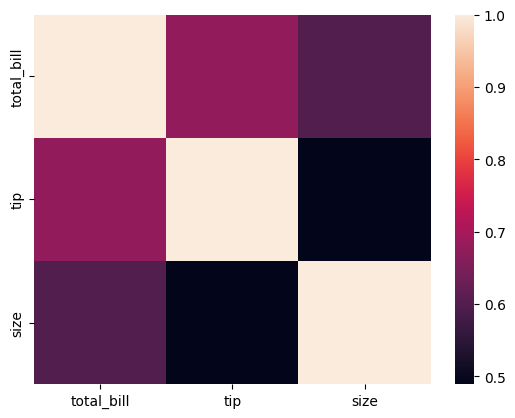

In [19]:
##  Heatmap example on tips data

sns.heatmap(tp)

<Axes: >

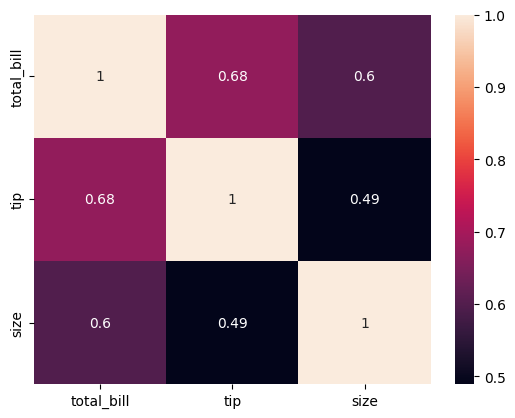

In [6]:
sns.heatmap(tp,annot=True)  # annot=True will show values in cells.

<Axes: >

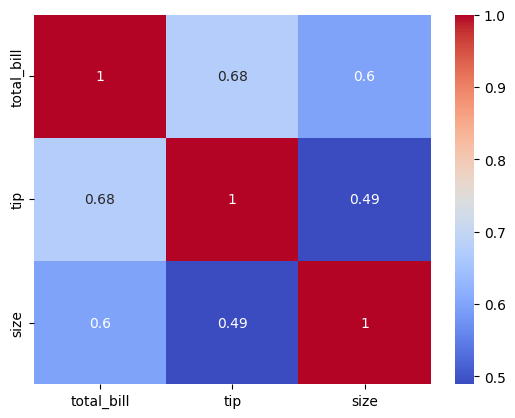

In [7]:
sns.heatmap(tp,annot=True,cmap='coolwarm')  # with different color

# Flights Data

In [8]:
# loading dataset from csv file
flights = pd.read_csv('./Dataset/flights.csv')

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Pivot Table

    * Converts long-form data into a matrix (table) format.

    * Allows you to aggregate data (mean, sum, count, etc.) when you have duplicate values for a given index/column combo.

#### Syntax
    * pd.pivot_table(data, index=None, columns=None, values=None, aggfunc='mean')

#### Parameters

| Parameter    | Description                                                                 |
| ------------ | --------------------------------------------------------------------------- |
| `data`       | The DataFrame you're working with                                           |
| `index`      | Column(s) to use as rows                                                    |
| `columns`    | Column(s) to use as columns                                                 |
| `values`     | Column(s) to use as cell values (usually numeric)                           |
| `aggfunc`    | Aggregation function: `'mean'` (default), `'sum'`, `'count'`, `'max'`, etc. |
| `fill_value` | Optional: replaces missing (NaN) values with specified value                |
| `margins`    | If `True`, adds row and column totals                                       |

#### 🧯 Avoid Decimal Values? Use aggfunc='first'

        * If each combination of index+column has a unique value and you still see decimals (due to averaging), do:

        pivot = pd.pivot_table(df, index='A', columns='B', values='C', aggfunc='first')

In [9]:
# Converting flights data into Matrix format using pivot_table.
fl = flights.pivot_table(index='month',columns='year',values='passengers',aggfunc='first')
fl

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


<Axes: xlabel='year', ylabel='month'>

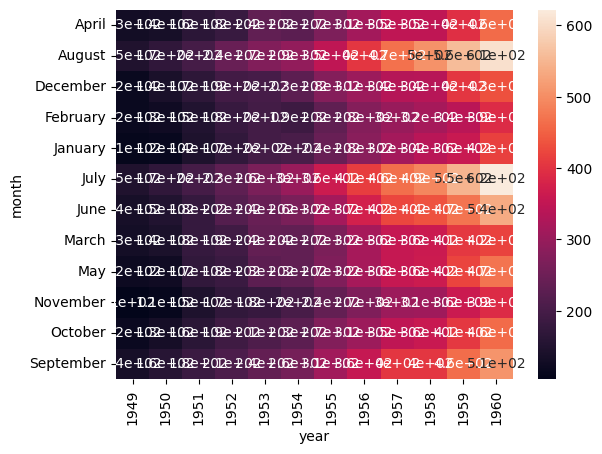

In [10]:
sns.heatmap(fl,annot=True)

<Axes: xlabel='year', ylabel='month'>

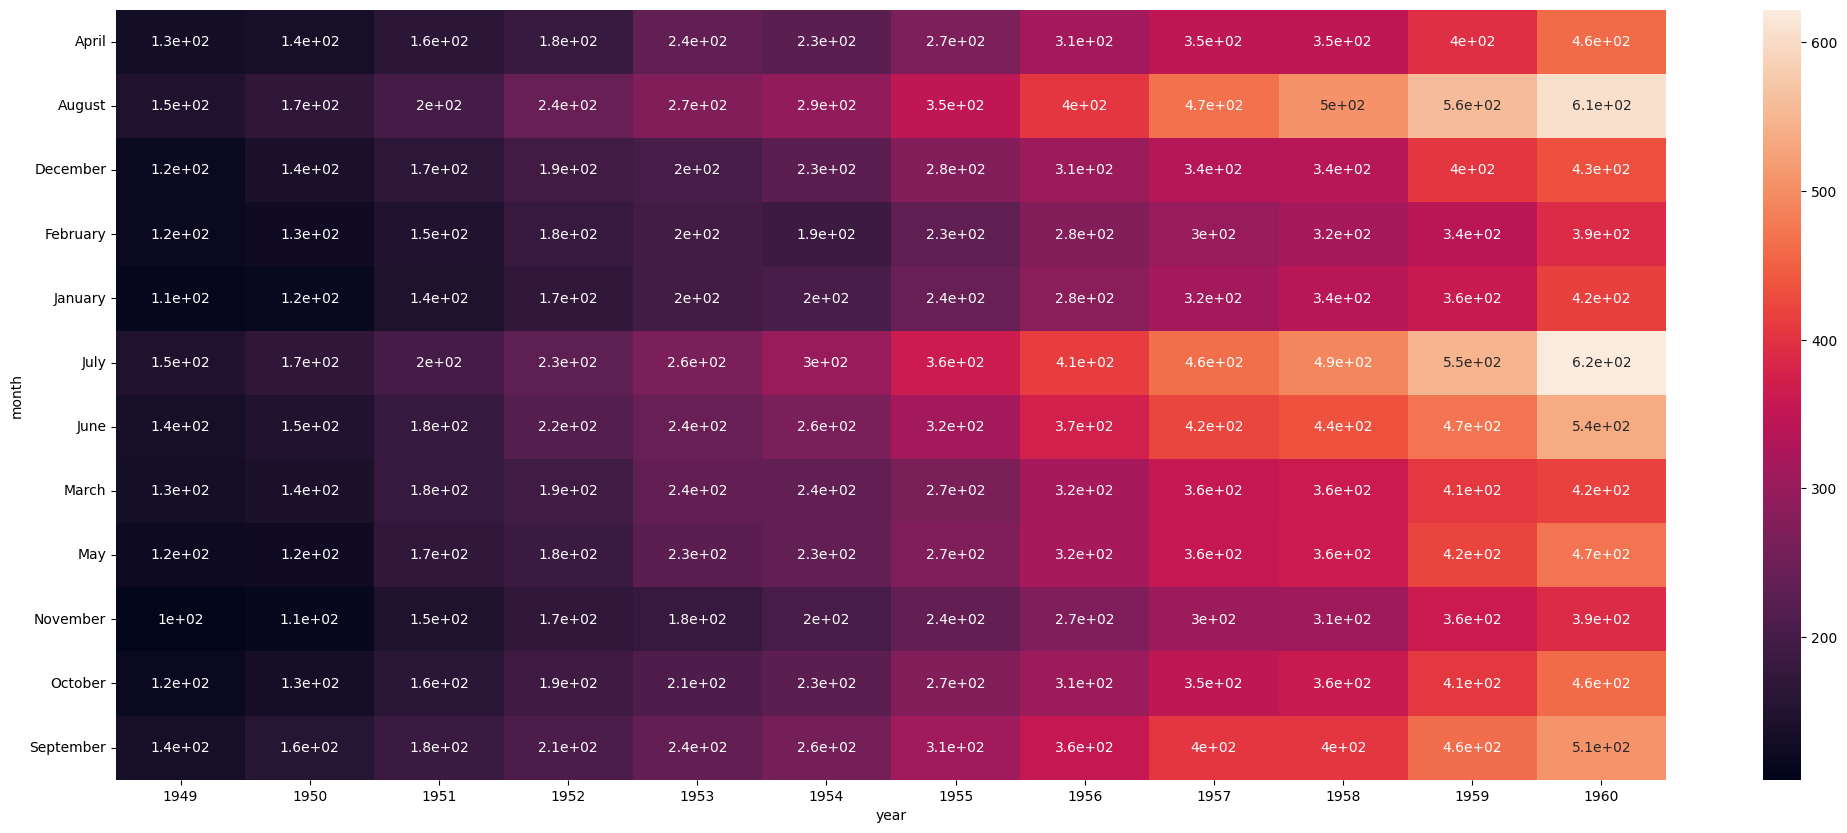

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))   # To show the values i am changing the plt size.
sns.heatmap(fl,annot=True)        

#### Note

    * That’s scientific notation (like 1.3e+2) showing up because your numbers are being formatted in exponential form by default.

    * To force heatmap annotations to display as regular integers (or fixed decimal points), you can set the fmt parameter in sns.heatmap().

#### Fix scientific notation in annotations

    * sns.heatmap(fl, annot=True, fmt="d")  # for integers
    
    * "d" means decimal integer formatting (no decimals, no scientific notation).

    * If your data has floats but you want fixed decimals, use e.g. "0.2f" for 2 decimal places.

<Axes: xlabel='year', ylabel='month'>

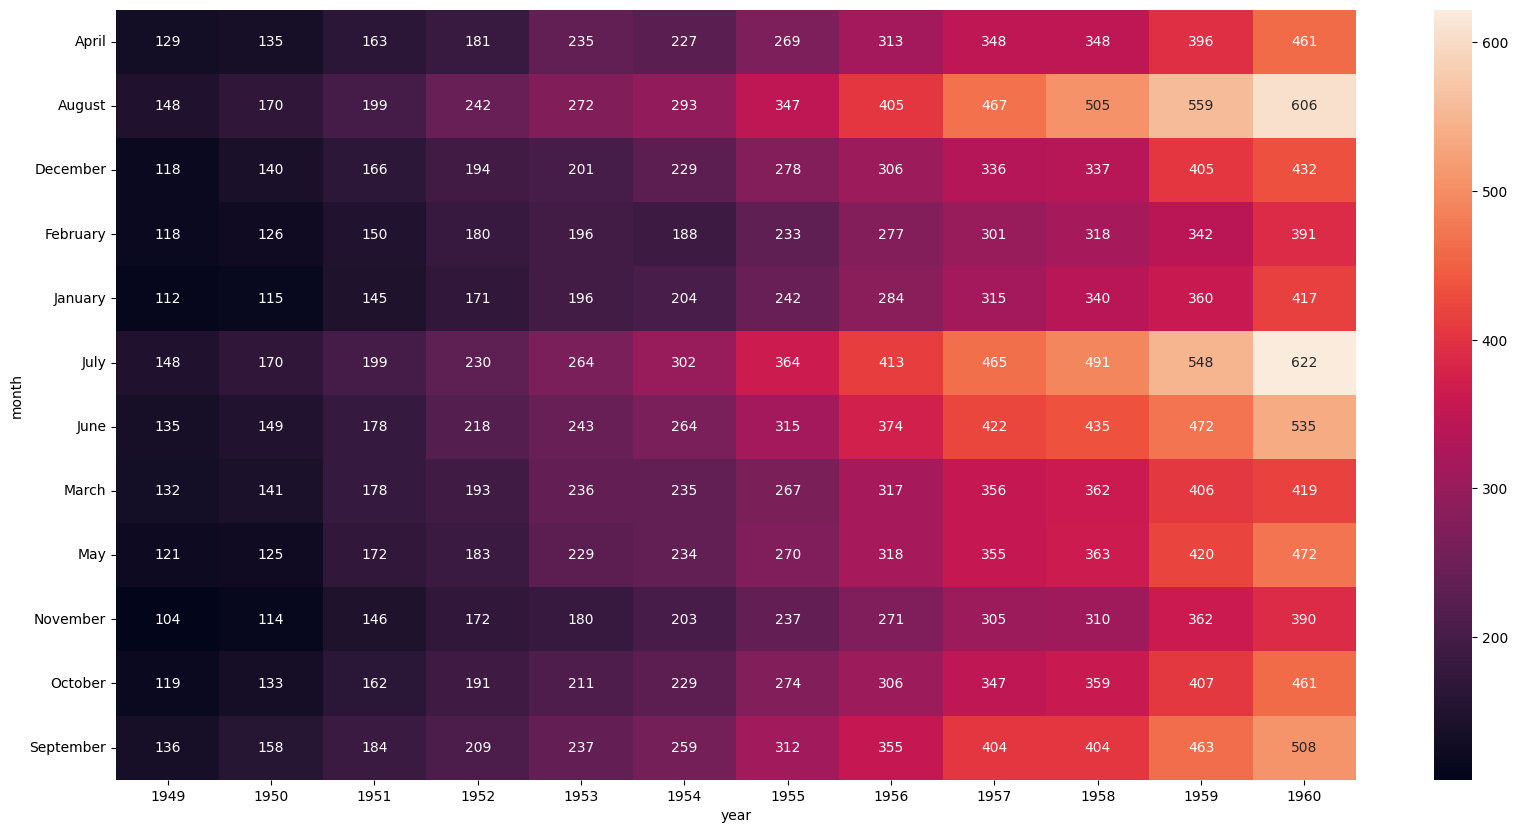

In [12]:
# To change the format
plt.figure(figsize=(20,10))
sns.heatmap(fl,annot=True,fmt='d')

<Axes: xlabel='year', ylabel='month'>

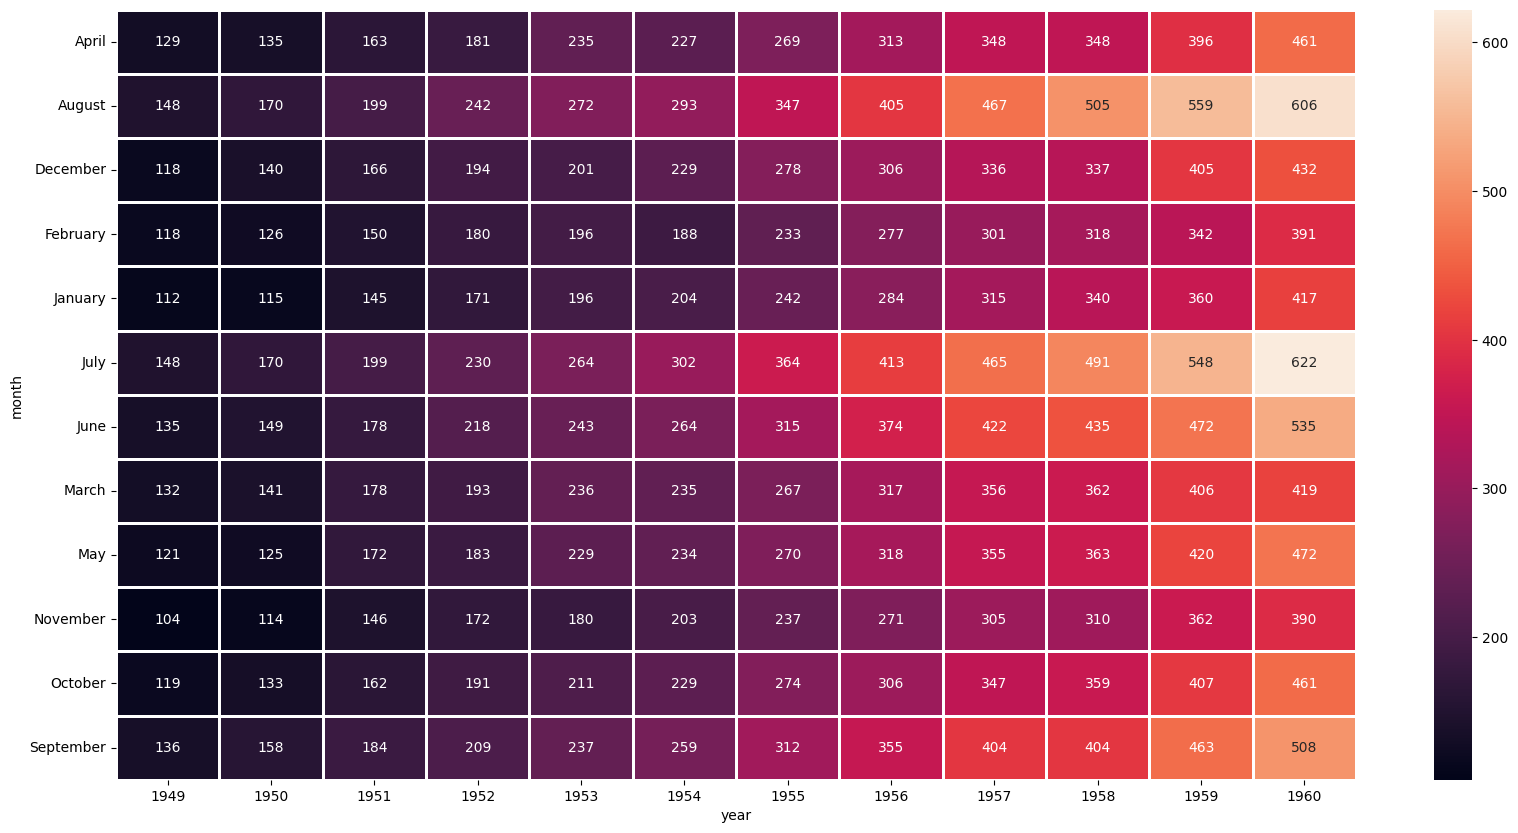

In [13]:
# To change the format
plt.figure(figsize=(20,10))
sns.heatmap(fl,annot=True,fmt='d',linecolor='white',linewidths=1)

### sns.clustermap()?

    * A cluster map is a heatmap + clustering:

    * It not only shows the data as a colored matrix, but also groups similar rows and columns together using hierarchical clustering (dendrograms).

    ✅ Great for:

        * Finding patterns

        * Grouping similar values

        * Detecting outliers in high-dimensional data

#### 🧠 How is it different from heatmap()?

| Feature       | `heatmap()`    | `clustermap()`                   |
| ------------- | -------------- | -------------------------------- |
| Color grid    | ✅ Yes          | ✅ Yes                            |
| Dendrograms   | ❌ No           | ✅ Yes (row/col clustering)       |
| Reorders data | ❌ Fixed order  | ✅ Automatically reorders         |
| Use case      | Simple 2D data | Pattern recognition & similarity |


<Figure size 2000x1000 with 0 Axes>

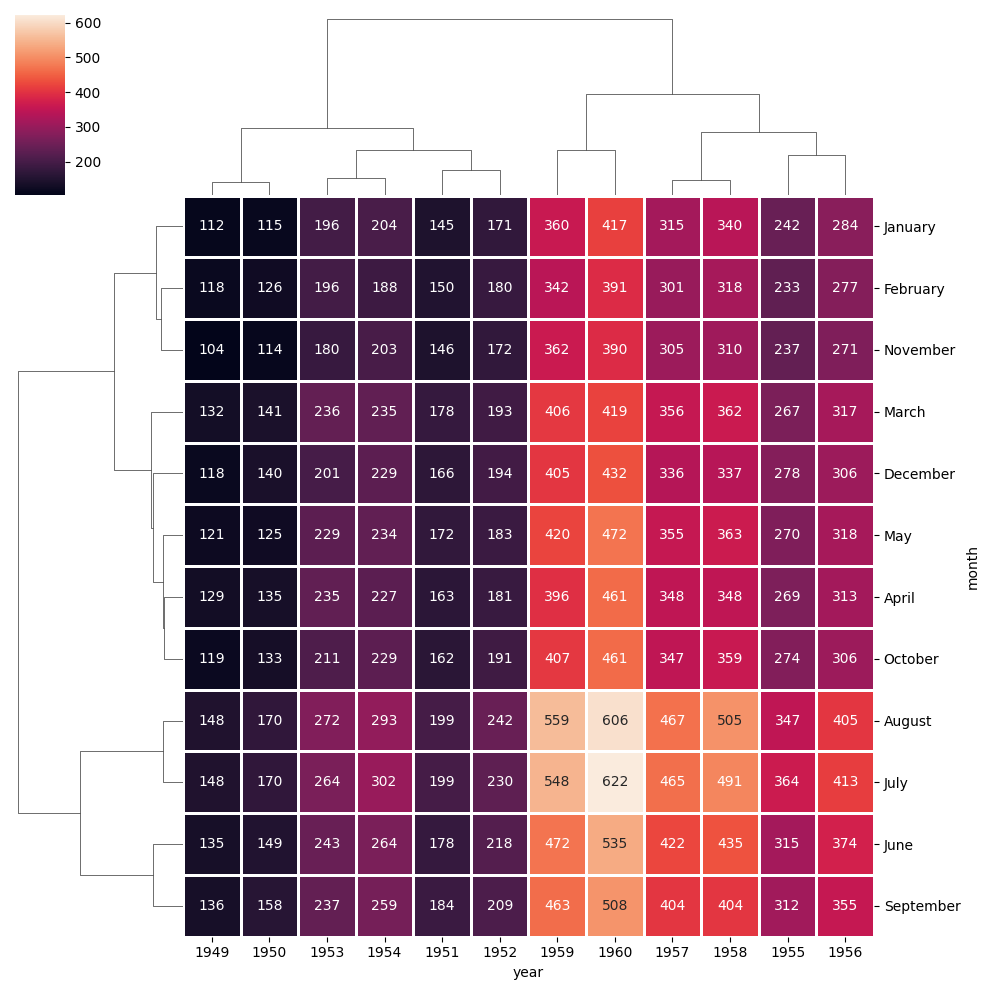

In [15]:
# To change the format
plt.figure(figsize=(20,10))
sns.clustermap(fl,annot=True,fmt='d',linecolor='white',linewidths=1)